<h1 style="color:red;">Taller 6</h1>


<h1> 1.  Método para crear grafos aleatorios</h1>
<p>Se genera un grafo aleatorio, la funcion generarGrafo recibe: </p>
<ul>
<li>Un grafo vacio</li>
<li>El numero de nodos</li>
<li>La probabilidad de unir dos nodos: es un numero entre 0 y 1</li>
<li>El rango en el que varia el peso de la arista</li>
</ul>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:

def generarGrafo(G,n,proba,mini,maxi):
    F={}
    for i in range(0, n):
        contador=0;
        for j in range (0,n):
            if(i!=j):
                aux=np.random.uniform(0,1)
                if(aux<proba):
                    peso=np.random.randint(mini,maxi);
                    if(contador==0):
                        F={i:{j:peso}}
                        contador=contador+1;
                    else:
                        F[i][j]=peso
        G.update(F)


In [3]:
G={};
generarGrafo(G,5,0.5,10,20)
print (G);


{0: {1: 17, 2: 19, 3: 13}, 1: {2: 12, 3: 19, 4: 15}, 2: {0: 16}, 3: {0: 17, 2: 10, 4: 15}, 4: {0: 17, 1: 16, 2: 14}}


<h1>2. Algoritmo de Dijkstra para calcular todos los pares de rutas más cortas</h1>

In [135]:
from heapq import heappush, heappop

def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
        
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            if(v in D.keys()):
                newDuv = D[u] + G[u][v]
                if newDuv < D[v]:
                    P[v] = u
                    D[v] = newDuv
                    updateheap(Q,D[v],v)
    return D,P

In [144]:
def shortestPath_Dijkstra(G):
    lista=[]
    for v in G:
        D,P = Dijkstra(G,v)
        print("Caminos para ",v, " :")
        for e in G:
            if(v!=e):
                path=[]
                contador=0;
                while 1:
                    if contador==10: 
                        path=[]
                        break;
                    path.append(e)
                    if(v==e):break;
                    if(e in P.keys()):
                        e=P[e]
                    contador=contador+1
                path.reverse()
                lista.append(path)
                print(path)
    return lista;

In [147]:
G={};
generarGrafo(G,5,0.7,10,20)
print (G);
print("Todas las rutas: ",shortestPath_Dijkstra(G))

{0: {1: 12, 2: 14, 3: 10, 4: 18}, 1: {2: 13, 3: 10, 4: 15}, 2: {0: 17, 1: 18, 3: 11, 4: 18}, 3: {1: 17, 2: 17, 4: 18}, 4: {0: 10, 1: 11, 2: 13, 3: 12}}
Caminos para  0  :
[0, 1]
[0, 2]
[0, 3]
[0, 4]
Caminos para  1  :
[1, 4, 0]
[1, 2]
[1, 3]
[1, 4]
Caminos para  2  :
[2, 0]
[2, 1]
[2, 3]
[2, 4]
Caminos para  3  :
[3, 4, 0]
[3, 1]
[3, 2]
[3, 4]
Caminos para  4  :
[4, 0]
[4, 1]
[4, 2]
[4, 3]
Todas las rutas:  [[0, 1], [0, 2], [0, 3], [0, 4], [1, 4, 0], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 3], [2, 4], [3, 4, 0], [3, 1], [3, 2], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3]]


<h1>3. Algoritmo de Bellman-Ford para calcular todos los pares de rutas más cortas</h1>

In [158]:
def BellmanFord(G,start):
    
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    for i in range(len(G)-1):
        for u in G:
            for v in G[u]:
                if(v in D.keys()):
                    newDv = D[u] + G[u][v]
                    if newDv < D[v]:
                        P[v] = u
                        D[v] = newDv
    
    for u in G:
        for v in G[u]:
            if(v in D.keys()):
                newDv = D[u] + G[u][v]
                if newDv < D[v]: break;
    #print("Negative cicle",u,v)
                
    return D,P

In [159]:
def shortestPath_Bellman(G,nombre):
    lista=[]
    for v in G:
        if(nombre=="bellman"):
            D,P = BellmanFord(G,v)
        else:
            Dijkstra(G,v)
                
        for e in G:
            if(v!=e):
                path=[]
                contador=0;
                while 1:
                    if contador==10: 
                        path=[]
                        break;
                    path.append(e)
                    if(v==e):break;
                    if(e in P.keys()):    
                        e=P[e]
                    contador=contador+1
                path.reverse()
                if(path!=[]):
                    lista.append(path)
                    print(path)
    return lista;



In [160]:
G={};
generarGrafo(G,5,0.7,-10,10)
print (G);
print("Todas las rutas: ",shortestPath_Bellman(G,"bellman"));

{0: {1: 8, 3: -4}, 1: {3: 0, 4: 1}, 2: {1: 5, 3: 1, 4: 3}, 3: {0: 7, 2: 6, 4: 3}, 4: {1: -9, 3: 8}}
[1, 3, 0]
[1, 3, 2]
[1, 3]
[1, 4]
[3, 0]
[3, 2]
[4, 1, 3, 0]
[4, 1]
[4, 1, 3, 2]
[4, 1, 3]
Todas las rutas:  [[1, 3, 0], [1, 3, 2], [1, 3], [1, 4], [3, 0], [3, 2], [4, 1, 3, 0], [4, 1], [4, 1, 3, 2], [4, 1, 3]]


<h1>4. Algoritmo de BFS para calcular todos los pares de rutas más cortas</h1>

In [175]:
def backtrac(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path


def bfs_conImpresion(graph, source, target):
    queue = []
    visited = {}
    parent = {}
    
    for node in range(len(graph)):
        visited[node] = False
        parent[node] = None
    
    queue.append(source)
    while len(queue) != 0:
        current = queue.pop(0)
        if current == target:
            print (backtrac(parent, source, target))
            return backtrac(parent, source, target)
            break
        for neighbor in graph[current]:
            if(neighbor in visited.keys()):
                if visited[neighbor] == False:
                    visited[neighbor] = True
                    parent[neighbor] = current
                    queue.append(neighbor)
                
                
def bfs(graph, source, target):
    queue = []
    visited = {}
    parent = {}
    
    for node in range(len(graph)):
        visited[node] = False
        parent[node] = None
    
    queue.append(source)
    while len(queue) != 0:
        current = queue.pop(0)
        if current == target:
            return backtrac(parent, source, target)
            break
        for neighbor in graph[current]:
            if(neighbor in visited.keys()):
                if visited[neighbor] == False:
                    visited[neighbor] = True
                    parent[neighbor] = current
                    queue.append(neighbor)
    
def shortestPath_BFS(G):
    for v in G:
        for d in G:
            if(v!=d):
                lista.append(bfs_conImpresion(G,v,d));
    return lista;

In [179]:
G={};
lista=[]
generarGrafo(G,5,0.7,0,10)
print(G);
lista= shortestPath_BFS(G);

print("lista completa: ",lista)



{0: {2: 0, 3: 3}, 1: {0: 5, 2: 0, 3: 4, 4: 2}, 2: {0: 7, 1: 9, 3: 4, 4: 5}, 3: {0: 2, 1: 6, 2: 7}, 4: {0: 9, 1: 3, 2: 8, 3: 8}}
[0, 2, 1]
[0, 2]
[0, 3]
[0, 2, 4]
[1, 0]
[1, 2]
[1, 3]
[1, 4]
[2, 0]
[2, 1]
[2, 3]
[2, 4]
[3, 0]
[3, 1]
[3, 2]
[3, 1, 4]
[4, 0]
[4, 1]
[4, 2]
[4, 3]
lista completa:  [[0, 2, 1], [0, 2], [0, 3], [0, 2, 4], [1, 0], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 1, 4], [4, 0], [4, 1], [4, 2], [4, 3]]


<h1>5. Analisis grafos aleatorios densos</h1>
<p>Para estos grafos al no presentarse muchas conexiones entre los nodos, en algunos casos el BFS no se genera de forma correcta.</p>

In [200]:
import time
import random as rnd
def time_analysis_Dijkstra_d(n):
    results = []
    for i in range(n):
        G={}
        aux=np.random.uniform(0,0.1)
        generarGrafo(G,n,aux,0,10)
        for g in G:
            t_inicial=time.clock()
            Dijkstra(G,g)
            t_final= time.clock()
            results.append(t_final-t_inicial)
    print(len(results))
    return results

In [201]:
print(time_analysis_Dijkstra_d(5))

5
[1.8666674918677018e-05, 1.8222230323772237e-05, 8.000003504093911e-06, 1.2444450021575904e-05, 4.000001808890374e-06]


In [202]:
import time
import random as rnd
def time_analysis_Bellman_d(n):
    results = []
    for i in range(n):
        G={}
        aux=np.random.uniform(0,0.1)
        generarGrafo(G,n,aux,-10,10)
        for g in G:
            t_inicial=time.clock()
            BellmanFord(G,g)
            t_final= time.clock()
            results.append(t_final-t_inicial)
    print(len(results))
    return results

In [203]:
print(time_analysis_Bellman_d(5))

6
[7.11111431428435e-06, 1.0666671414583107e-05, 8.444448098998691e-06, 7.555559022875968e-06, 8.000003504093911e-06, 3.111112505393976e-06]


In [204]:
import time
import random as rnd
def time_analysis_BFS_d(n):
    results = []
    for i in range(n):
        G={}
        aux=np.random.uniform(0,0.1)
        generarGrafo(G,n,aux,-10,10)
        for g in G:
            for v in G:
                t_inicial=time.clock()
                bfs(G,g,v)
                t_final= time.clock()
                results.append(t_final-t_inicial)
    print(len(results))
    return results

In [206]:
print(time_analysis_BFS_d(5))

6
[7.11111431428435e-06, 4.000001808890374e-06, 2.6666677968023578e-06, 2.6666679104891955e-06, 2.6666677968023578e-06, 2.2222232018975774e-06]


29
32
6


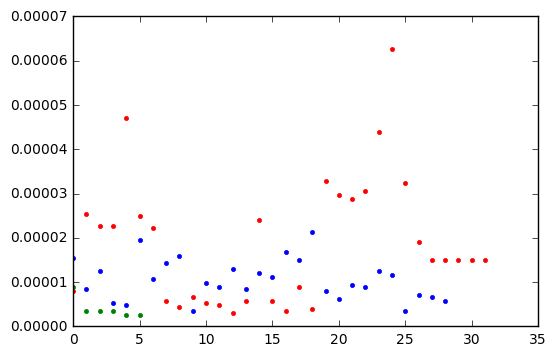

In [234]:
pl.clf()
y = np.array(time_analysis_Dijkstra_d(10))
x=np.arange(len(y))
pl.plot(x, y, 'k.',color='blue')
y = np.array(time_analysis_Bellman_d(10))
x=np.arange(len(y))
pl.plot(x, y, 'k.',color='red')
y = np.array(time_analysis_BFS_d(5))
x=np.arange(len(y))
pl.plot(x, y, 'k.',color='green')

<h1>6. Analisis grafos aleatorios dispersos</h1>

In [224]:
import time
import random as rnd
def time_analysis_Dijkstra(n):
    results = []
    for i in range(n):
        G={}
        aux=np.random.uniform(0.9,1)
        generarGrafo(G,n,aux,0,10)
        for g in G:
            t_inicial=time.clock()
            Dijkstra(G,g)
            t_final= time.clock()
            results.append(t_final-t_inicial)
    print(len(results))
    return results

In [225]:
print(time_analysis_Dijkstra(3))

9
[2.488889992946497e-05, 1.2444449907889066e-05, 1.2000005312984285e-05, 1.2000005312984285e-05, 1.0222226819678326e-05, 1.0222226819678326e-05, 1.1555560718079505e-05, 1.2444450021575904e-05, 1.2000005312984285e-05]


In [226]:
import time
import random as rnd
def time_analysis_Bellman(n):
    results = []
    for i in range(n):
        G={}
        aux=np.random.uniform(0.9,1)
        generarGrafo(G,n,aux,-10,10)
        for g in G:
            t_inicial=time.clock()
            BellmanFord(G,g)
            t_final= time.clock()
            results.append(t_final-t_inicial)
    print(len(results))
    return results

In [227]:
print(time_analysis_Bellman(5))

25
[5.555558027481311e-05, 4.844446596052876e-05, 4.622224275863118e-05, 4.622224275863118e-05, 4.666668735353596e-05, 4.800002136562398e-05, 4.5333353455134784e-05, 4.5333353455134784e-05, 4.444446426532522e-05, 4.4444464151638385e-05, 4.57777981637264e-05, 4.444446426532522e-05, 4.444446426532522e-05, 4.4444464151638385e-05, 4.4888908860230003e-05, 4.888891066912038e-05, 4.75555767707192e-05, 4.755557665703236e-05, 4.755557665703236e-05, 4.844446596052876e-05, 4.800002136562398e-05, 4.711113194844074e-05, 4.800002136562398e-05, 4.711113206212758e-05, 4.711113206212758e-05]


In [228]:
import time
import random as rnd
def time_analysis_BFS(n):
    results = []
    for i in range(n):
        G={}
        aux=np.random.uniform(0.9,1)
        generarGrafo(G,n,aux,-10,10)
        for g in G:
            for v in G:
                t_inicial=time.clock()
                bfs(G,g,v)
                t_final= time.clock()
                results.append(t_final-t_inicial)
    print(len(results))
    return results

In [229]:
print(time_analysis_BFS(5))

125
[8.444448212685529e-06, 8.88889280759031e-06, 8.88889280759031e-06, 1.2444450021575904e-05, 8.444448212685529e-06, 6.222225010787952e-06, 3.111112505393976e-06, 7.555558909189131e-06, 8.444448098998691e-06, 9.777782111086708e-06, 5.777780302196334e-06, 7.1111142005975125e-06, 3.111112505393976e-06, 8.444448212685529e-06, 9.777782111086708e-06, 6.222225010787952e-06, 7.11111431428435e-06, 8.444448098998691e-06, 3.111112505393976e-06, 9.777782111086708e-06, 5.777780415883171e-06, 8.444448212685529e-06, 8.444448212685529e-06, 9.777782111086708e-06, 3.111112505393976e-06, 4.000001695203537e-06, 6.222225010787952e-06, 7.555558909189131e-06, 8.88889280759031e-06, 1.1555560718079505e-05, 6.222225010787952e-06, 3.111112505393976e-06, 7.1111142005975125e-06, 8.444448098998691e-06, 1.0222226819678326e-05, 5.777780415883171e-06, 7.1111142005975125e-06, 3.111112505393976e-06, 8.444448212685529e-06, 1.0222226705991488e-05, 5.777780302196334e-06, 7.1111142005975125e-06, 8.444448212685529e-06, 3.

100
100
125


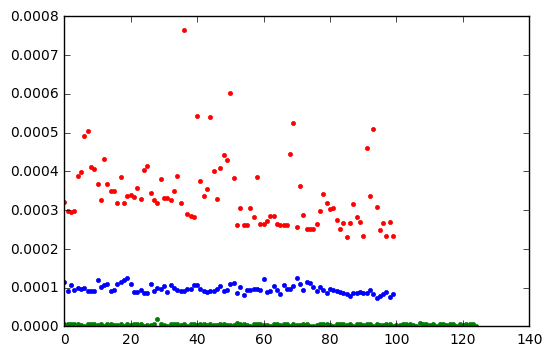

In [231]:
pl.clf()
y = np.array(time_analysis_Dijkstra(10))
x=np.arange(len(y))
pl.plot(x, y, 'k.',color='blue')
y = np.array(time_analysis_Bellman(10))
x=np.arange(len(y))
pl.plot(x, y, 'k.',color='red')
y = np.array(time_analysis_BFS(5))
x=np.arange(len(y))
pl.plot(x, y, 'k.',color='green')